## Exploratory Analysis of Skincare Subreddits

For this exploratory analysis, we are looking at skincare trends through reddit. Reddit has various skincare platforms, when searching "Skincare on Reddit" these are the top 3 subreddits: 

1. r/SkincareAddcition with 4.3m members
2. r/AsianBeauty with 2.9m members
3. r/30PlusSkinCare with 2.1m members

Additional, country specific subreddits: 
1. r/SkincareAddictionUK with 484k members
2. r/IndianSkincareAddicts with 242k members
3. r/AusSkincare with 177k members

There are other large subreddits such as:
1. r/Skincare_Addiction with 1.8 members
2. r/SkincareAddicts with 1m members
However, these two subreddits are likely spin-offs of r/SkincareAddition. While the rest of the subreddits target a nicher group (Asian brands, >30, UK, India, Aus), the demographic of these two would be similar to r/SkincareAddiction and thus will not be used. 

Exploratory data analysis will be on these three subreddits. We are going to first explore the top posts of each subreddits. 

1st = just a table to see the top 100 posts 
2nd = table to see how often certain ingredients have been referenced over the three subs
3rd = table to see top posts which have referenced these ingredients in title 

### Step 1: Crawling a real world data set 
#### Step 1.1 Importing necessary functions and setting up PRAW

In [4]:
#import necessary functions (as needed so far)
import datetime 
import praw #reddit crawler
import pandas as pd

#things needed to use PRAW
client_id = '5KkxQHtUgHzvz6pPMTbvSw'
client_secret = 'mWXvZcxvcpyEheEt_gM_3ODTvOBw7g'
user_agent = 'cryinginpython98'

reddit = praw.Reddit(client_id=client_id,client_secret=client_secret,user_agent=user_agent)

#create a list of subreddits 
#create empty list for the posts 
#loop through - take title, body, upvotes, comment, created 

#### Step 1.2 Checking if reddit API Key is working
Output = true if working

In [6]:
print(reddit.read_only) #check if it is working, needs to output == True

True


#### Step 1.3: Selecting Subreddits 
This exploratory analysis will be looking at 6 different skincare subreddits. As mentioned above, a general skincare subreddit (which is also the most popular), as well as more niche subreddits that are targetted at people who like specific brands (Asian Beauty), people from different countries (UK, Aus/NZ, India), or a different age group (>30).

In [8]:
#input all the subreddits we are looking at
subreddit1 = reddit.subreddit('SkincareAddiction')
subreddit2 = reddit.subreddit('AsianBeauty')
subreddit3 = reddit.subreddit('30PlusSkinCare')
subreddit4 = reddit.subreddit('SkincareAddictionUK')
subreddit5 = reddit.subreddit('IndianSkincareAddicts')
subreddit6 = reddit.subreddit('AusSkincare')
#create a list to loop through
subreddits = [subreddit1,subreddit2,subreddit3,subreddit4,subreddit5,subreddit6]

#Displaying the subreddits, also as a check to see if the subreddits are being called correctly
for subreddit in subreddits:
    # Display the name of the Subreddit
    print("Display Name:", subreddit.display_name)
    # Display the title of the Subreddit
    print("Title:", subreddit.title)

Display Name: SkincareAddiction
Title: For anything and everything having to do with skincare!
Display Name: AsianBeauty
Title: AsianBeauty
Display Name: 30PlusSkinCare
Title: Skin care for people over 30
Display Name: SkincareAddictionUK
Title: A UK-centric skincare subreddit.
Display Name: IndianSkincareAddicts
Title: IndianSkincareAddicts
Display Name: AusSkincare
Title: Australian & New Zealand Skincare


#### Step 1.4 Loading of Subreddit Data into DataFrame
Inital runs of this exploratory analysis only looked into the top posts, however, due to the casual nature of these forums, there are many joke (meme) posts. This was not as condusive to looking into the skincare side of the skincare subreddit. Hence, we are going to look at specific ingridents and skin concerns. Popular or trending skincare ingridents are identified with the a google, and a couple ingridents manually added based on own knowledge. Similarly, common skin concerns are identified with google.

#### Step 1.5 Defining Skin Concerns and Ingredients

In [20]:
#Ingredients that will be searched for
ing = [
    'retinol', 'vitamin c', 'hyaluronic', 'niacinamide', 'salicylic',
    'benzoyl peroxide', 'glycerin', 'peptide', 'ceramide',
    'bakuchiol', 'vitamin e', 'glycolic', 'AHA', 'BHA', 'PHA', 
    'squalene', 'jojoba', 'azelaic', 'hydroquinone', 'lactic','SPF'
]
#concerns to be looked at
concerns = [
    'acne', 'dry', 'dull', 'redness', 'dark circles', 'eye bags', 
    'wrinkle', 'aging', 'uneven', 'rough', 'hyperpigmentation', 'sunscreen'
]

In [16]:
def get_date(submission):
    '''Function to convert the timestamp from html to useable time'''
    time = submission.created
    return datetime.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')

In [18]:
#initialize list that will hold all the data scrapped
info = []

In [24]:
#loop through each of the subreddits
for subreddit in subreddits:
    #loop through the top 1000 posts
    for sub in subreddit.top(limit=1000):
        #lowercase for search
        title = sub.title.lower()  
        body = sub.selftext.lower()

        #default 
        ing_pres = None
        concern_pres = None 

        #loop for each ingredient in the ing list
        for ingredient in ing:
            #if exists in the posts title or body
            if ingredient in title or ingredient in body:
                #ingredient present, assign value
                ing_pres = ingredient
    
        #loop for each concern in concern list
        for concern in concerns:
            #if exists in posts title or body
            if concern in title or concern in body:
                concern_pres = concern

        #call function to change the date to something useable
        sub_date = get_date(sub)

        #now the main thing,
        #if the post contains a mention of what we want (ingredient or concern)
        #add it to the dictionary
        if ing_pres or concern_pres:
                sub_data = {
                    'subreddit': subreddit.display_name,
                    'title': sub.title,
                    'body': sub.selftext,
                    'upvotes': sub.score,
                    'num_comments': sub.num_comments,
                    'url': sub.url,
                    'ingredient' : ing_pres,
                    'concern': concern_pres,
                    'date': sub_date
                }
                #append to list
                info.append(sub_data)

print(len(info)) #see what data collected 

2105


#### Step 1.6 Looping through the subreddits to extract the relevant data

In [26]:
#create pandas dataframe
df=pd.DataFrame(info)
#see whats inside
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     2105 non-null   object
 1   title         2105 non-null   object
 2   body          2105 non-null   object
 3   upvotes       2105 non-null   int64 
 4   num_comments  2105 non-null   int64 
 5   url           2105 non-null   object
 6   ingredient    716 non-null    object
 7   concern       1849 non-null   object
 8   date          2105 non-null   object
dtypes: int64(2), object(7)
memory usage: 148.1+ KB


In [28]:
df.head(10) #see whats inside

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
0,SkincareAddiction,Posted here over a month ago showing how [acne...,,17351,257,https://i.redd.it/dtm3c3p277z41.jpg,None,acne,2020-05-16 22:50:03
1,SkincareAddiction,[Anti-Aging] I may have used too much retinol ...,,15803,115,https://i.redd.it/r8g7c71mti3a1.jpg,retinol,sunscreen,2022-12-02 17:36:48
2,SkincareAddiction,[Selfie] 2 year transformation and glow up. Cy...,,11643,287,https://i.redd.it/8l4z6jzyogb51.jpg,None,acne,2020-07-17 19:36:02
3,SkincareAddiction,[Personal] My Mother at 53 years old. She's th...,,11231,272,http://i.imgur.com/Ph4JiDD.jpg,None,sunscreen,2016-10-16 22:19:03
4,SkincareAddiction,"[B&A] [Selfie] 3 microneedling sessions, 1 las...",,11150,340,https://i.redd.it/ruermpk6cwg31.jpg,hyaluronic,None,2019-08-17 00:35:56
5,SkincareAddiction,[Before&After] Finding the right dermatologist...,,11140,484,https://www.reddit.com/gallery/nn7th5,None,sunscreen,2021-05-28 22:13:12
6,SkincareAddiction,[PSA] SKIN CARE FOR PROTESTERS,\nFOR PEPPER SPRAY: \n\n-Don’t touch the expos...,10865,333,https://www.reddit.com/r/SkincareAddiction/com...,None,sunscreen,2020-06-02 18:15:31
7,SkincareAddiction,Puberty is making [Acne] hit hard but we’re tr...,,10508,435,https://i.redd.it/o74bastn0iq41.jpg,None,rough,2020-04-03 01:36:29
8,SkincareAddiction,[B&A] I posted my acne scar treatment progress...,,10310,350,https://i.redd.it/g7dlglcqhn011.jpg,None,acne,2018-05-28 20:47:06
9,SkincareAddiction,[Acne] One year apart ✨,,9529,259,https://www.reddit.com/gallery/ltlqvl,None,acne,2021-02-27 10:56:48


In [30]:
df.tail(10) #see whats inside from behind

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
2095,AusSkincare,Thoughts on reuseable silicone eye gels?,What the title says - I’ve been looking into g...,42,19,https://i.redd.it/oc22e1t7kjya1.jpg,None,redness,2023-05-08 01:13:57
2096,AusSkincare,I need help with blackheads,I'm currently using the hydro boost as my clea...,41,44,https://i.redd.it/0z85d7qo9jv91.jpg,None,rough,2022-10-23 06:33:45
2097,AusSkincare,Meccas Sunscreen serum ☀️,Has anyone tried this yet? It looks so interes...,42,9,https://i.redd.it/yp6u27kfaqj91.jpg,None,sunscreen,2022-08-24 22:20:46
2098,AusSkincare,We can now drop off all brands of empty beauty...,,40,2,https://i.redd.it/wfnxr6c4tdg91.png,None,aging,2022-08-08 01:11:11
2099,AusSkincare,Your favourite SPF50+ long lasting sunscreen,I’ve just got a job as a Traffic Controller wh...,42,21,https://www.reddit.com/r/AusSkincare/comments/...,None,sunscreen,2021-11-30 09:30:33
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,https://www.reddit.com/r/AusSkincare/comments/...,vitamin c,rough,2021-09-08 10:29:31
2101,AusSkincare,Hey what’s everyone’s experience with these tw...,,42,72,https://www.reddit.com/gallery/jsqrds,None,sunscreen,2020-11-12 07:54:16
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,https://www.reddit.com/r/AusSkincare/comments/...,jojoba,None,2020-08-11 10:48:35
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,https://www.reddit.com/r/AusSkincare/comments/...,bakuchiol,None,2020-06-21 04:42:50
2104,AusSkincare,Best Of/ Holy Grail Products: EXFOLIANTS,Hi there and welcome to the Best Of/ Holy Grai...,44,19,https://www.reddit.com/r/AusSkincare/comments/...,None,rough,2019-10-15 01:02:53


#### Step 1.7 Export into CSV

In [34]:
df.to_csv('OX24006_SDPA_data.csv') #export to csv

#### 1.8 Describing this data set: 

This data set comes from 6 different skincare subreddits. The most popular skincare subreddit, 2 of the next most popular skincare subreddits that are targetted at a more niche audience (Asian Beauty and Skincare over 30), as well as 3 more niche subreddits which are still in the top few but relatively not as popular. 

Data was scrapped using PRAW, Python Reddit API Wrapper. This package allowed  BLA BLA BLA. The initial list of variables for consideration were based off PRAW guides, citing Title, Body (Self-text), URL, upvotes and comments. 

Hence, the variables of interest in this analysis are: BLA BLA BAL. Most of the data is categorical. 

### Step 2: Data Preparation and Cleaning 
The next step in this analysis would be to clean and prepare the data.

First remove duplicates
Handling missing data: Observe where it is from, remove any missing data 
Remove any duplicates
Handle any outliers or inconsistencies in the data, if any.
Perform any additional steps to enrich your data (parsing dates, creating additional
columns/features, etc.)

In [121]:
#So a proper copy is needed, if not any changes made to a "copy" will mess up the analysis 
wdf = df.copy() #working df

#### Step 2.1 Handling duplicates

Using drop duplicates to remove any duplicate values.

In [123]:
wdf.drop_duplicates() #remove doops

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
0,SkincareAddiction,Posted here over a month ago showing how [acne...,,17351,257,https://i.redd.it/dtm3c3p277z41.jpg,None,acne,2020-05-16 22:50:03
1,SkincareAddiction,[Anti-Aging] I may have used too much retinol ...,,15803,115,https://i.redd.it/r8g7c71mti3a1.jpg,retinol,sunscreen,2022-12-02 17:36:48
2,SkincareAddiction,[Selfie] 2 year transformation and glow up. Cy...,,11643,287,https://i.redd.it/8l4z6jzyogb51.jpg,None,acne,2020-07-17 19:36:02
3,SkincareAddiction,[Personal] My Mother at 53 years old. She's th...,,11231,272,http://i.imgur.com/Ph4JiDD.jpg,None,sunscreen,2016-10-16 22:19:03
4,SkincareAddiction,"[B&A] [Selfie] 3 microneedling sessions, 1 las...",,11150,340,https://i.redd.it/ruermpk6cwg31.jpg,hyaluronic,None,2019-08-17 00:35:56
...,...,...,...,...,...,...,...,...,...
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,https://www.reddit.com/r/AusSkincare/comments/...,vitamin c,rough,2021-09-08 10:29:31
2101,AusSkincare,Hey what’s everyone’s experience with these tw...,,42,72,https://www.reddit.com/gallery/jsqrds,None,sunscreen,2020-11-12 07:54:16
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,https://www.reddit.com/r/AusSkincare/comments/...,jojoba,None,2020-08-11 10:48:35
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,https://www.reddit.com/r/AusSkincare/comments/...,bakuchiol,None,2020-06-21 04:42:50


Return value shows no duplicates in dataset (started at 2105, still 2105)

#### Step 2.2 Handling missing data
##### Item 1: 
From glancing at the dataset, there are many instances of missing body in a reddit submission. These will need to be deleted. 

##### Item 2: 
In addition, there are two instances of values that are missing on purpose. The scraping rules set wanted to find posts related to either specific skincare ingredients or specific skin care concerns. Not all posts would have both. 

Before removal of rows with missing values, the necessary null values will be filled. 

##### Item 3:
In addition, I want to also observe the dataset that has both ingredient and concern. Hence, another copy will be made, and all none values will be removed 

##### Item 3:

In [82]:
#Item 3
df_both = df.copy() #create copy

In [84]:
df_both.dropna() #drop rows with anything empty 

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
1,SkincareAddiction,[Anti-Aging] I may have used too much retinol ...,,15803,115,https://i.redd.it/r8g7c71mti3a1.jpg,retinol,sunscreen,2022-12-02 17:36:48
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,https://www.reddit.com/r/SkincareAddiction/com...,retinol,aging,2022-06-16 15:25:32
40,SkincareAddiction,[PSA] If someone is happy with their skincare ...,I think many of us have been in this situation...,6432,482,https://www.reddit.com/r/SkincareAddiction/com...,hyaluronic,sunscreen,2019-10-02 00:39:13
56,SkincareAddiction,[B&A] A lurkers 14-15 months of hard work and ...,"As an avid lurker, I have finally decided to p...",5668,241,https://www.reddit.com/gallery/z4wy65,glycolic,sunscreen,2022-11-26 03:36:58
69,SkincareAddiction,"[Humor] Me wait for the Niacinamide, Retinol a...",,5307,126,https://i.imgur.com/nRKOC3M.jpg,niacinamide,acne,2019-11-15 06:29:03
...,...,...,...,...,...,...,...,...,...
2075,AusSkincare,Accutane saved me.,"https://i.imgur.com/ulESxbZ.jpg \n\n27 now, I’...",46,31,https://www.reddit.com/r/AusSkincare/comments/...,lactic,sunscreen,2020-07-08 13:38:09
2079,AusSkincare,AIRYDAY SPF Review: Mineral Mousse & Pretty in...,Any questions? Please do ask! And share how yo...,46,37,https://www.reddit.com/gallery/13f6t5h,vitamin c,dry,2023-05-12 02:39:18
2081,AusSkincare,Reviews of popular sunscreens I’ve tried so far,"Been a bit of a sunscreen junkie lately, so th...",44,24,https://www.reddit.com/r/AusSkincare/comments/...,vitamin c,sunscreen,2021-08-23 11:01:07
2094,AusSkincare,Priceline’s free skincare gift bag promotion s...,What I purchased to get the gift bag: \n\nCer...,44,28,https://i.redd.it/9tndg6xsyu1c1.jpg,niacinamide,hyperpigmentation,2023-11-22 08:16:33


The current row count is currently 460. However the preview shows that there is still empty cells in 'body'. In addition, the 'info' portion shows no null values. This indicates that the value in body could possibly be an empty string. 

Replace empty string and remove null values again

In [88]:
#replace "_" with NA, null value
df_both.replace("", pd.NA, inplace=True)
#remove empty
df_both.dropna(inplace=True)
df_both #print to check

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,https://www.reddit.com/r/SkincareAddiction/com...,retinol,aging,2022-06-16 15:25:32
40,SkincareAddiction,[PSA] If someone is happy with their skincare ...,I think many of us have been in this situation...,6432,482,https://www.reddit.com/r/SkincareAddiction/com...,hyaluronic,sunscreen,2019-10-02 00:39:13
56,SkincareAddiction,[B&A] A lurkers 14-15 months of hard work and ...,"As an avid lurker, I have finally decided to p...",5668,241,https://www.reddit.com/gallery/z4wy65,glycolic,sunscreen,2022-11-26 03:36:58
80,SkincareAddiction,[Before&After] 6 months of retinol,Just wanted to share some progress on my skinc...,4957,242,https://i.redd.it/xrn26lu70ak91.jpg,bakuchiol,wrinkle,2022-08-27 16:39:06
83,SkincareAddiction,[Personal] Aren't most 'shelfies' are just glo...,I love reading this sub but I really think all...,4938,321,https://www.reddit.com/r/SkincareAddiction/com...,retinol,rough,2018-05-09 02:36:54
...,...,...,...,...,...,...,...,...,...
2075,AusSkincare,Accutane saved me.,"https://i.imgur.com/ulESxbZ.jpg \n\n27 now, I’...",46,31,https://www.reddit.com/r/AusSkincare/comments/...,lactic,sunscreen,2020-07-08 13:38:09
2079,AusSkincare,AIRYDAY SPF Review: Mineral Mousse & Pretty in...,Any questions? Please do ask! And share how yo...,46,37,https://www.reddit.com/gallery/13f6t5h,vitamin c,dry,2023-05-12 02:39:18
2081,AusSkincare,Reviews of popular sunscreens I’ve tried so far,"Been a bit of a sunscreen junkie lately, so th...",44,24,https://www.reddit.com/r/AusSkincare/comments/...,vitamin c,sunscreen,2021-08-23 11:01:07
2094,AusSkincare,Priceline’s free skincare gift bag promotion s...,What I purchased to get the gift bag: \n\nCer...,44,28,https://i.redd.it/9tndg6xsyu1c1.jpg,niacinamide,hyperpigmentation,2023-11-22 08:16:33


##### Timestamp conversion
Additionally, the date column is written as: "2019-10-15 01:02:53" For analysis of the timeline, we will just look at the year. To do this we need to extract the year and store it into a new column.

Although the  extraction of the timestamp was already done using the datetime function, it did not work without converting the column into a date-time format. Hence the date column was converted into date time before extracting the year. 

In [143]:
#conversion into dt format to use dt function to easily extract year
#select column date, convert to dt
df_both['date'] = pd.to_datetime(df_both['date'])
#new column 'year' with the value of 'date' columns year
df_both['year'] = df_both['date'].dt.year

In [145]:
df_both.info() #check info 

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 25 to 2100
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subreddit     446 non-null    object        
 1   title         446 non-null    object        
 2   body          446 non-null    object        
 3   upvotes       446 non-null    int64         
 4   num_comments  446 non-null    int64         
 5   url           446 non-null    object        
 6   ingredient    446 non-null    object        
 7   concern       446 non-null    object        
 8   date          446 non-null    datetime64[ns]
 9   year          446 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(6)
memory usage: 36.6+ KB


There are now two columns with information unecessary. 
1. URL - this was used for own checking after extraction into csv.
2. Date - with year extracted it is not needed 

In [155]:
df_both = df_both.drop(columns=['url', 'date']) #remove unecessary
df_both

,subreddit,title,body,upvotes,num_comments,ingredient,concern,year
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,retinol,aging,2022
40,SkincareAddiction,[PSA] If someone is happy with their skincare ...,I think many of us have been in this situation...,6432,482,hyaluronic,sunscreen,2019
56,SkincareAddiction,[B&A] A lurkers 14-15 months of hard work and ...,"As an avid lurker, I have finally decided to p...",5668,241,glycolic,sunscreen,2022
80,SkincareAddiction,[Before&After] 6 months of retinol,Just wanted to share some progress on my skinc...,4957,242,bakuchiol,wrinkle,2022
83,SkincareAddiction,[Personal] Aren't most 'shelfies' are just glo...,I love reading this sub but I really think all...,4938,321,retinol,rough,2018
...,...,...,...,...,...,...,...,...
2075,AusSkincare,Accutane saved me.,"https://i.imgur.com/ulESxbZ.jpg \n\n27 now, I’...",46,31,lactic,sunscreen,2020
2079,AusSkincare,AIRYDAY SPF Review: Mineral Mousse & Pretty in...,Any questions? Please do ask! And share how yo...,46,37,vitamin c,dry,2023
2081,AusSkincare,Reviews of popular sunscreens I’ve tried so far,"Been a bit of a sunscreen junkie lately, so th...",44,24,vitamin c,sunscreen,2021
2094,AusSkincare,Priceline’s free skincare gift bag promotion s...,What I purchased to get the gift bag: \n\nCer...,44,28,niacinamide,hyperpigmentation,2023


##### df_both is now a table of cleaned data which has items which mention both a skincare and a concern

##### Item 2: Fill in the null values in ingredient and concern in wdf

In [125]:
#replcace the 'none' with 'not specified'
wdf['ingredient'].fillna('not specificed', inplace=True)
wdf['concern'].fillna('not specified', inplace=True)
wdf #print to check

/var/folders/8j/mb2drjzj3n33v47t1853n8f40000gn/T/ipykernel_64630/1808966493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wdf['ingredient'].fillna('not specificed', inplace=True)
/var/folders/8j/mb2drjzj3n33v47t1853n8f40000gn/T/ipykernel_64630/1808966493.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
0,SkincareAddiction,Posted here over a month ago showing how [acne...,,17351,257,https://i.redd.it/dtm3c3p277z41.jpg,not specificed,acne,2020-05-16 22:50:03
1,SkincareAddiction,[Anti-Aging] I may have used too much retinol ...,,15803,115,https://i.redd.it/r8g7c71mti3a1.jpg,retinol,sunscreen,2022-12-02 17:36:48
2,SkincareAddiction,[Selfie] 2 year transformation and glow up. Cy...,,11643,287,https://i.redd.it/8l4z6jzyogb51.jpg,not specificed,acne,2020-07-17 19:36:02
3,SkincareAddiction,[Personal] My Mother at 53 years old. She's th...,,11231,272,http://i.imgur.com/Ph4JiDD.jpg,not specificed,sunscreen,2016-10-16 22:19:03
4,SkincareAddiction,"[B&A] [Selfie] 3 microneedling sessions, 1 las...",,11150,340,https://i.redd.it/ruermpk6cwg31.jpg,hyaluronic,not specified,2019-08-17 00:35:56
...,...,...,...,...,...,...,...,...,...
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,https://www.reddit.com/r/AusSkincare/comments/...,vitamin c,rough,2021-09-08 10:29:31
2101,AusSkincare,Hey what’s everyone’s experience with these tw...,,42,72,https://www.reddit.com/gallery/jsqrds,not specificed,sunscreen,2020-11-12 07:54:16
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,https://www.reddit.com/r/AusSkincare/comments/...,jojoba,not specified,2020-08-11 10:48:35
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,https://www.reddit.com/r/AusSkincare/comments/...,bakuchiol,not specified,2020-06-21 04:42:50


After replacement of the empty values, replace the empty strings and drop rows with empty cells

In [127]:
wdf.replace("", pd.NA, inplace=True)
#remove empty
wdf.dropna(inplace=True)
wdf

,subreddit,title,body,upvotes,num_comments,url,ingredient,concern,date
6,SkincareAddiction,[PSA] SKIN CARE FOR PROTESTERS,\nFOR PEPPER SPRAY: \n\n-Don’t touch the expos...,10865,333,https://www.reddit.com/r/SkincareAddiction/com...,not specificed,sunscreen,2020-06-02 18:15:31
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,https://www.reddit.com/r/SkincareAddiction/com...,retinol,aging,2022-06-16 15:25:32
27,SkincareAddiction,[Acne] My acne and sebaceous filaments have al...,1. APRIL\n2. Fools.\n\nI wish such a thing exi...,7460,294,https://www.reddit.com/r/SkincareAddiction/com...,not specificed,acne,2019-04-01 19:32:52
30,SkincareAddiction,[Acne] Fuck acne fuck acne fuck acne fuck acne...,Fuck acne fuck acne fuck fuck fuck fuck acne f...,7248,351,https://www.reddit.com/r/SkincareAddiction/com...,not specificed,acne,2019-11-13 20:48:40
31,SkincareAddiction,[Before&After] Faceplanted in a fire pit about...,Was prescribed Silvadene to apply in the burns...,7149,234,https://i.redd.it/exq7gqm3627b1.jpg,not specificed,redness,2023-06-20 00:21:45
...,...,...,...,...,...,...,...,...,...
2099,AusSkincare,Your favourite SPF50+ long lasting sunscreen,I’ve just got a job as a Traffic Controller wh...,42,21,https://www.reddit.com/r/AusSkincare/comments/...,not specificed,sunscreen,2021-11-30 09:30:33
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,https://www.reddit.com/r/AusSkincare/comments/...,vitamin c,rough,2021-09-08 10:29:31
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,https://www.reddit.com/r/AusSkincare/comments/...,jojoba,not specified,2020-08-11 10:48:35
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,https://www.reddit.com/r/AusSkincare/comments/...,bakuchiol,not specified,2020-06-21 04:42:50


Extraction of year:

In [141]:
#conversion into dt format to use dt function to easily extract year
#select column date, convert to dt
wdf['date'] = pd.to_datetime(wdf['date'])
#new column 'year' with the value of 'date' columns year
wdf['year'] = wdf['date'].dt.year

As in df_both, the unecessary columns are removed

In [158]:
wdf = wdf.drop(columns=['url', 'date'])
wdf

,subreddit,title,body,upvotes,num_comments,ingredient,concern,year
6,SkincareAddiction,[PSA] SKIN CARE FOR PROTESTERS,\nFOR PEPPER SPRAY: \n\n-Don’t touch the expos...,10865,333,not specificed,sunscreen,2020
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,retinol,aging,2022
27,SkincareAddiction,[Acne] My acne and sebaceous filaments have al...,1. APRIL\n2. Fools.\n\nI wish such a thing exi...,7460,294,not specificed,acne,2019
30,SkincareAddiction,[Acne] Fuck acne fuck acne fuck acne fuck acne...,Fuck acne fuck acne fuck fuck fuck fuck acne f...,7248,351,not specificed,acne,2019
31,SkincareAddiction,[Before&After] Faceplanted in a fire pit about...,Was prescribed Silvadene to apply in the burns...,7149,234,not specificed,redness,2023
...,...,...,...,...,...,...,...,...
2099,AusSkincare,Your favourite SPF50+ long lasting sunscreen,I’ve just got a job as a Traffic Controller wh...,42,21,not specificed,sunscreen,2021
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,vitamin c,rough,2021
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,jojoba,not specified,2020
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,bakuchiol,not specified,2020


##### Normalizing the upvotes and comments:
Just from looking at the DataFrame, it is clear that there is a huge difference between comment and upvotes in the different subreddits. This is likely due to the differences in member number:
- r/SkincareAddcition - 4.3m members
- r/AsianBeauty - 2.9m members
- r/30PlusSkinCare - 2.1m members
- r/SkincareAddictionUK - 484k members
- r/IndianSkincareAddicts - 242k members
- r/AusSkincare with - members


Normalization will be done by making it a ratio of the subreddit's member count. 
- upvotes_norm = upvotes/members * 100000
- comments_norm = comments/members * 100000

100000 value was decided by trial and error, starting at 1000, to find at which point the normalized number would be best viewed

In [278]:
#because not in DF, need to add in
#create dict with numbers
subreddit_members = {
    'SkincareAddiction': 4300000,  
    'AsianBeauty': 2900000,
    '30PlusSkinCare': 2100000,
    'SkincareAddictionUK': 484000,
    'IndianSkincareAddicts': 242000,
    'AusSkincare': 177000
}

#use map function to add 
wdf['members'] = wdf['subreddit'].map(subreddit_members)

#def function to normalize the variables
def normalization(row, column):
    """basically a function to just divide it by the member count, and mulitply by 100000"""
    return (row[column] / row['members'])*100000
    
wdf['upvotes_norm'] = wdf.apply(normalization, axis=1, column='upvotes') #apply function
wdf['comments_norm'] = wdf.apply(normalization, axis=1, column='num_comments') #apply function
wdf

,subreddit,title,body,upvotes,num_comments,ingredient,concern,year,members,upvotes_norm,comments_norm
6,SkincareAddiction,[PSA] SKIN CARE FOR PROTESTERS,\nFOR PEPPER SPRAY: \n\n-Don’t touch the expos...,10865,333,not specificed,sunscreen,2020,4300000,252.674419,7.744186
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,retinol,aging,2022,4300000,174.302326,10.116279
27,SkincareAddiction,[Acne] My acne and sebaceous filaments have al...,1. APRIL\n2. Fools.\n\nI wish such a thing exi...,7460,294,not specificed,acne,2019,4300000,173.488372,6.837209
30,SkincareAddiction,[Acne] Fuck acne fuck acne fuck acne fuck acne...,Fuck acne fuck acne fuck fuck fuck fuck acne f...,7248,351,not specificed,acne,2019,4300000,168.558140,8.162791
31,SkincareAddiction,[Before&After] Faceplanted in a fire pit about...,Was prescribed Silvadene to apply in the burns...,7149,234,not specificed,redness,2023,4300000,166.255814,5.441860
...,...,...,...,...,...,...,...,...,...,...,...
2099,AusSkincare,Your favourite SPF50+ long lasting sunscreen,I’ve just got a job as a Traffic Controller wh...,42,21,not specificed,sunscreen,2021,177000,23.728814,11.864407
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,vitamin c,rough,2021,177000,23.728814,8.474576
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,jojoba,not specified,2020,177000,23.163842,32.203390
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,bakuchiol,not specified,2020,177000,23.163842,11.864407


Additionally, a ratio value for the relationship between the upvotes and the comments will be calculated to determine the post engagement. 
- comments/upvotes, a number closer to 1 means more engagement 

In [288]:
wdf['engagement'] = wdf['num_comments']/wdf['upvotes'] #calculate the ratio and add new column
wdf

,subreddit,title,body,upvotes,num_comments,ingredient,concern,year,members,upvotes_norm,comments_norm,engagement
6,SkincareAddiction,[PSA] SKIN CARE FOR PROTESTERS,\nFOR PEPPER SPRAY: \n\n-Don’t touch the expos...,10865,333,not specificed,sunscreen,2020,4300000,252.674419,7.744186,0.030649
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,retinol,aging,2022,4300000,174.302326,10.116279,0.058039
27,SkincareAddiction,[Acne] My acne and sebaceous filaments have al...,1. APRIL\n2. Fools.\n\nI wish such a thing exi...,7460,294,not specificed,acne,2019,4300000,173.488372,6.837209,0.039410
30,SkincareAddiction,[Acne] Fuck acne fuck acne fuck acne fuck acne...,Fuck acne fuck acne fuck fuck fuck fuck acne f...,7248,351,not specificed,acne,2019,4300000,168.558140,8.162791,0.048427
31,SkincareAddiction,[Before&After] Faceplanted in a fire pit about...,Was prescribed Silvadene to apply in the burns...,7149,234,not specificed,redness,2023,4300000,166.255814,5.441860,0.032732
...,...,...,...,...,...,...,...,...,...,...,...,...
2099,AusSkincare,Your favourite SPF50+ long lasting sunscreen,I’ve just got a job as a Traffic Controller wh...,42,21,not specificed,sunscreen,2021,177000,23.728814,11.864407,0.500000
2100,AusSkincare,Whats the point of having actives in cleansers...,Unpopular opinion i know. I'm not new to skinc...,42,15,vitamin c,rough,2021,177000,23.728814,8.474576,0.357143
2102,AusSkincare,"Priceline 3 Day Sale (40% off Skincare, Suncar...",Priceline is doing another big 3 day sale! \n\...,41,57,jojoba,not specified,2020,177000,23.163842,32.203390,1.390244
2103,AusSkincare,PSA: Moo Goo has launched a 1% bakuchiol serum!,"So I was on Moo Goo's website, clicking around...",41,21,bakuchiol,not specified,2020,177000,23.163842,11.864407,0.512195


##### wdf is now a table of cleaned data which has items which mention either a skincare and a concern

##### The same functions have been applied into df_both

In [290]:
df_both['members'] = df_both['subreddit'].map(subreddit_members)
    
df_both['upvotes_norm'] = df_both.apply(normalization, axis=1, column='upvotes') #apply function
df_both['comments_norm'] = df_both.apply(normalization, axis=1, column='num_comments') #apply function
df_both['engagement'] = df_both['num_comments']/df_both['upvotes']
df_both

,subreddit,title,body,upvotes,num_comments,ingredient,concern,year,members,upvotes_norm,comments_norm,engagement
25,SkincareAddiction,"[Misc] Some of you need a therapist, not a der...",Some of the posts I see on here are incredibly...,7495,435,retinol,aging,2022,4300000,174.302326,10.116279,0.058039
40,SkincareAddiction,[PSA] If someone is happy with their skincare ...,I think many of us have been in this situation...,6432,482,hyaluronic,sunscreen,2019,4300000,149.581395,11.209302,0.074938
56,SkincareAddiction,[B&A] A lurkers 14-15 months of hard work and ...,"As an avid lurker, I have finally decided to p...",5668,241,glycolic,sunscreen,2022,4300000,131.813953,5.604651,0.042519
80,SkincareAddiction,[Before&After] 6 months of retinol,Just wanted to share some progress on my skinc...,4957,242,bakuchiol,wrinkle,2022,4300000,115.279070,5.627907,0.048820
83,SkincareAddiction,[Personal] Aren't most 'shelfies' are just glo...,I love reading this sub but I really think all...,4938,321,retinol,rough,2018,4300000,114.837209,7.465116,0.065006
...,...,...,...,...,...,...,...,...,...,...,...,...
2075,AusSkincare,Accutane saved me.,"https://i.imgur.com/ulESxbZ.jpg \n\n27 now, I’...",46,31,lactic,sunscreen,2020,177000,25.988701,17.514124,0.673913
2079,AusSkincare,AIRYDAY SPF Review: Mineral Mousse & Pretty in...,Any questions? Please do ask! And share how yo...,46,37,vitamin c,dry,2023,177000,25.988701,20.903955,0.804348
2081,AusSkincare,Reviews of popular sunscreens I’ve tried so far,"Been a bit of a sunscreen junkie lately, so th...",44,24,vitamin c,sunscreen,2021,177000,24.858757,13.559322,0.545455
2094,AusSkincare,Priceline’s free skincare gift bag promotion s...,What I purchased to get the gift bag: \n\nCer...,44,28,niacinamide,hyperpigmentation,2023,177000,24.858757,15.819209,0.636364


#### Step 2.3 Grouping and Aggregation

Aggregate by: years 
Aggregate by: 

### Step 3 Exploratory analysis

In [203]:
#importing seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### 3.1 Counts of each item

##### 3.1.1 Number of submissions per subreddit

In [180]:
counts_subreddit= wdf['subreddit'].value_counts()
print(counts_subreddit)

subreddit
SkincareAddictionUK      532
30PlusSkinCare           339
IndianSkincareAddicts    337
AusSkincare              235
AsianBeauty              109
SkincareAddiction         67
Name: count, dtype: int64


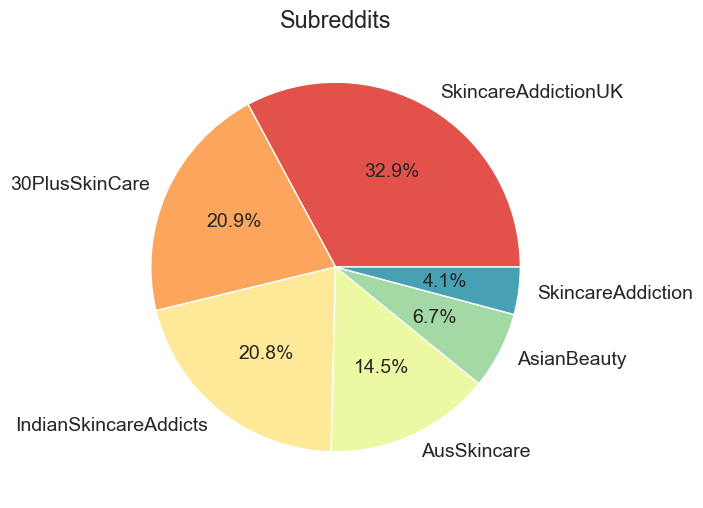

In [311]:
pie_colour = sns.color_palette("Spectral", 6)
plt.figure(figsize=(6,6))
plt.pie(counts_subreddit.values, labels=counts_subreddit.index, autopct='%1.1f%%',colors=pie_colour)
plt.title('Subreddits')
plt.show()

Despite SkincareAddition and Asian beauty being the largest two subreddits, these two subreddits brought in the fewest number of submissions that bring up the specific skincare concerns or ingredients. It is possible that due to the large size of the subreddit, more of the top posts did not fit our search criteria. For AsianBeauty, this subreddit includes makeup as well as skincare, which could contribute to it being the second lowest. 

This could indicate that despite their large size, r/SkincareAdditction and r/AsianBeauty may not be the top choice for someone wanting information on skincare. It is possible that smaller subredits could be more useful in finding information and that the members are more likely to help with a specific skincare-related question. 

##### 3.1.2 Number of each ingredient and concern mentioned

Counts for each will be displayed and a bar plot to visualize the data

In [314]:
counts_ing= wdf['ingredient'].value_counts()
counts_concern = wdf['concern'].value_counts()
print(counts_ing)
print(counts_concern)

ingredient
not specificed      985
glycolic             70
lactic               62
azelaic              59
niacinamide          56
vitamin c            52
hyaluronic           48
ceramide             47
retinol              45
salicylic            42
peptide              31
glycerin             27
vitamin e            26
benzoyl peroxide     20
hydroquinone         17
jojoba               14
squalene             11
bakuchiol             7
Name: count, dtype: int64
concern
sunscreen            532
rough                276
not specified        188
aging                157
dry                  139
acne                 133
redness               56
hyperpigmentation     52
wrinkle               47
dark circles          15
uneven                12
dull                   9
eye bags               3
Name: count, dtype: int64


##### The count information will be displayed as a bar plot: 

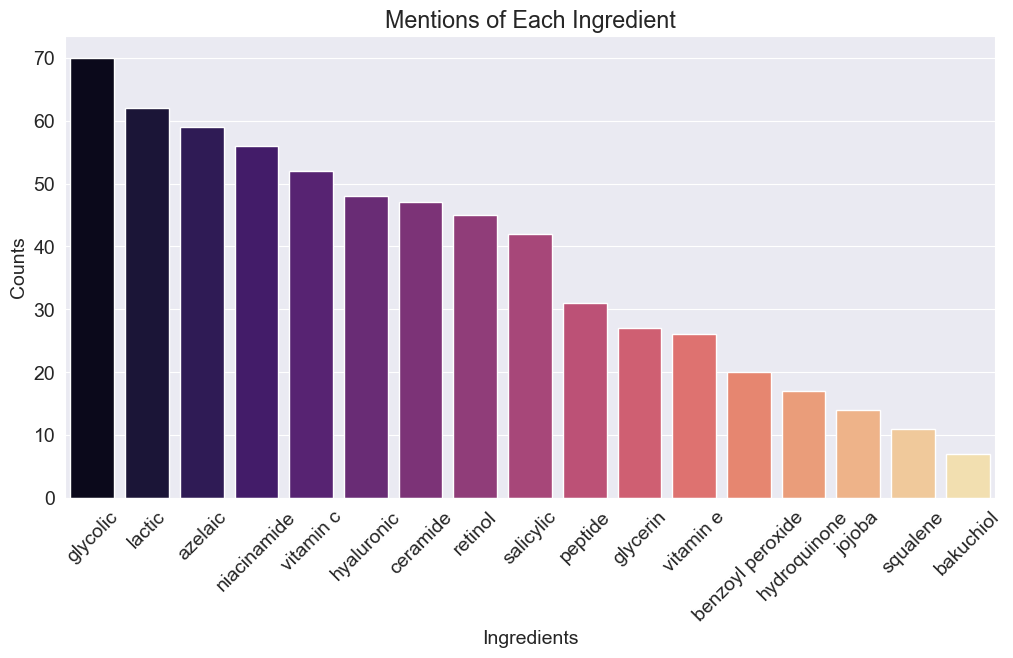

In [316]:
count_ing = counts_ing.drop('not specificed') #made a spelling error here now live with it
colour = sns.color_palette("magma",17)
plt.figure(figsize=(12, 6))
sns.barplot(x=count_ing.index, y=count_ing.values,palette=colour,hue=count_ing.index,dodge=False,legend=False) 

# Customize the plot
plt.xticks(rotation=45)
plt.title('Mentions of Each Ingredient')
plt.xlabel('Ingredients')
plt.ylabel('Counts')
plt.show()


Glycolic (acid) was the most mentioned term, followed by latic (acid) and azelaic (acid). These three are considered exfoliants, it would then be expected that concern about acne or skin texture would be prominent skin issues. The next most popular is niacinamide, and all round ingridient. Vitamin c, which is brightening. Hyaluronic (acid), which is hydrating. Followed by ceramides, for skin barrier and retinol, for skin renewal. 

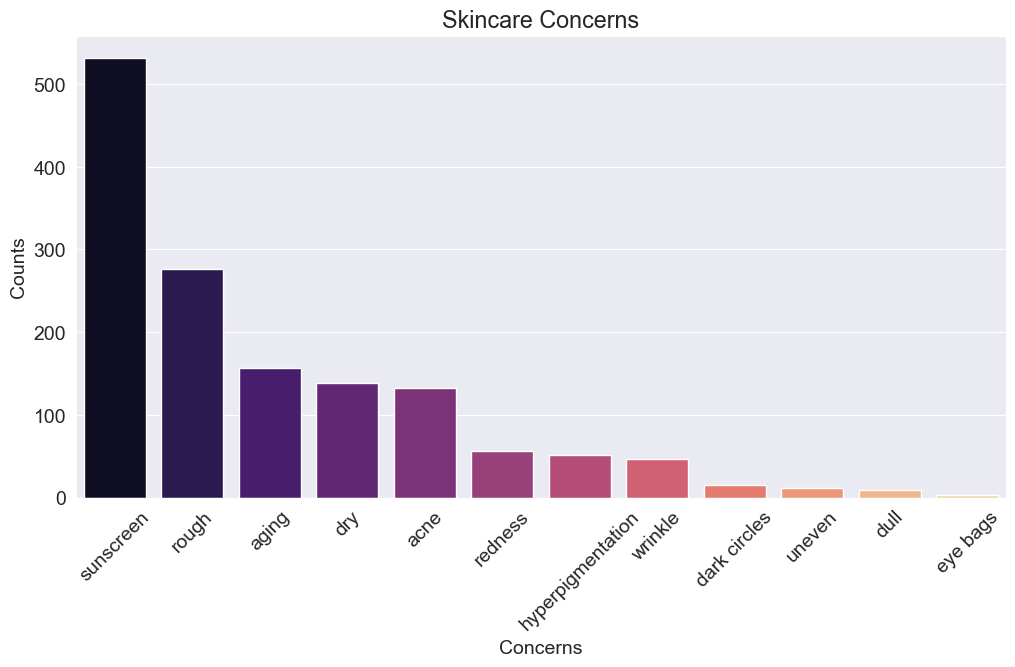

In [318]:
count_concern = counts_concern.drop('not specified')
colour = sns.color_palette("magma",12)
plt.figure(figsize=(12, 6))
sns.barplot(x=count_concern.index, y=count_concern.values,palette=colour,hue=count_concern.index,dodge=False,legend=False) 

# Customize the plot
plt.xticks(rotation=45)
plt.title('Skincare Concerns')
plt.xlabel('Concerns')
plt.ylabel('Counts')
plt.show()

The bar plot shows us that sunscreen was most talked about by a stagering amount. While the term 'sunscreen' itself is not directly a skin concern, but it insinuates desire for skin protection. Sunscreen is widely considered the most important skincare item. As such it make sense that it is the most prominent item being brought up in the skincare subreddit.

The second most common concern on reddit was 'rough' suggesting problems with skin texture. This is in line with the ppopular ingredients bring exfoliants. The next concern was aging, which is expected considered the nature of the topic. Dry and acne are abour equal in terms of mentions. 

It should also be noted that one post may not only be mentioning one ingredient or concern, but only the first is picked up.

#### Step 3.3 Mean, sum, range 
Only 3 values are numerical in this data set: upvotes and comments (as well as their normalzied versions) and engagement. Year is sorted as an integer but is more categorical in this case. However, the finding the range helps us to see the breath of our data set. 

In [320]:
wdf.describe()

,upvotes,num_comments,year,members,upvotes_norm,comments_norm,engagement
count,1619.000000,1619.000000,1619.000000,1.619000e+03,1619.000000,1619.000000,1619.000000
mean,632.642372,122.474985,2021.613959,1.048015e+06,49.944746,17.538731,0.551339
std,1521.527252,174.609842,2.087653,1.118456e+06,68.445691,23.130779,0.606834
min,17.000000,0.000000,2014.000000,1.770000e+05,3.512397,0.000000,0.000000
25%,43.000000,24.000000,2020.000000,2.420000e+05,9.297521,4.317829,0.175359
50%,138.000000,59.000000,2022.000000,4.840000e+05,33.476190,9.504132,0.356343
75%,605.000000,141.500000,2023.000000,2.100000e+06,64.049587,22.720779,0.685966
max,27311.000000,1638.000000,2024.000000,4.300000e+06,1300.523810,365.289256,6.960630


From the table above, we see that the earliest year of posts is 2014, and the latest is 2024. This gives us 10 years of reddit data. 

Looking at the normalzied upvotes and comments, there is still a large range and standard deviation. This makes sense given that top 1000 is a large range. However, the average post engagement is 0.55, with a standard deviation of 0.60, where the range goes from 0 - 6.98. This shows that even a top post could have very little comments and engagement, but alot of people 'liking' the post. 

In [322]:
df_both.describe()

,upvotes,num_comments,year,members,upvotes_norm,comments_norm,engagement
count,446.000000,446.000000,446.000000,4.460000e+02,446.000000,446.000000,446.000000
mean,533.522422,111.730942,2021.558296,1.027451e+06,51.053437,18.551467,0.495147
std,1023.443245,147.372720,2.131616,1.138681e+06,49.118559,21.937851,0.572385
min,18.000000,0.000000,2014.000000,1.770000e+05,3.719008,0.000000,0.000000
25%,56.000000,28.000000,2020.000000,2.420000e+05,17.318966,4.171096,0.175556
50%,155.000000,61.000000,2022.000000,4.840000e+05,43.452381,10.743802,0.338757
75%,575.500000,124.000000,2023.000000,2.100000e+06,68.020581,25.206612,0.576965
max,8721.000000,1077.000000,2024.000000,4.300000e+06,415.285714,177.272727,4.913043


The descriptive data in df_both is similar. 

### Step 4 Questions about the data (Further Analysis)

#### How have the trends/popularity within skincare changed over time?
- Have skincare trends moved differently between the different demographics?
- Are specific ingredients more important within certain demographics?
- Do different demographics have different skincare concerns?

- Additional questions based on the pre-analysis: reddit engagement between subs

4.1 Differences between frequency in the 6 subreddits

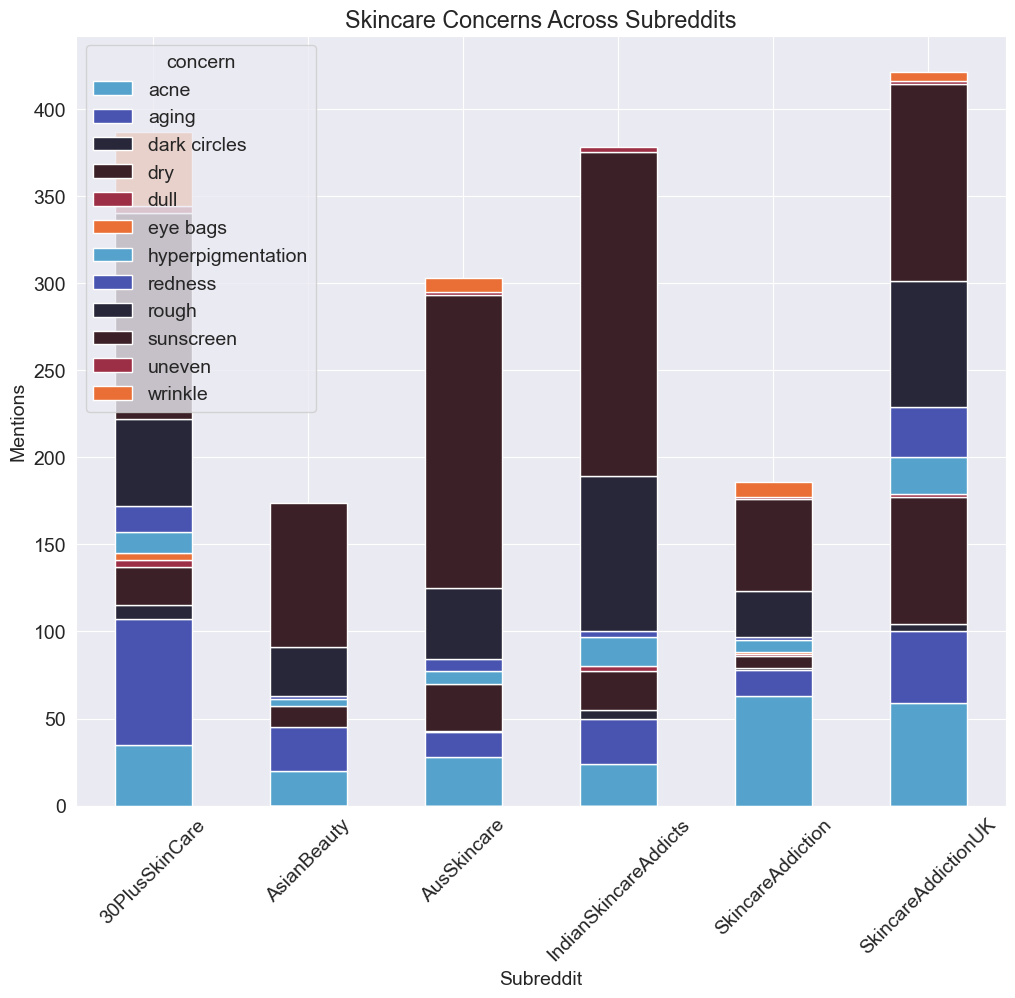

In [352]:
concern_by_sub = df.groupby(['subreddit', 'concern']).size().unstack(fill_value=0)
stacked_colour = sns.color_palette("icefire")
concern_by_sub.plot(kind='bar', stacked=True, figsize=(12, 10), title="Skincare Concerns Across Subreddits", color=stacked_colour)
plt.xticks(rotation=45)
plt.xlabel("Subreddit")
plt.ylabel("Mentions")
plt.show()